In [15]:

import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [17]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [18]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine['class'].unique()

array([0., 1.])

In [8]:
wine['class'].value_counts()

class
1.0    4898
0.0    1599
Name: count, dtype: int64

In [9]:
# hold-out 기법

In [10]:
wine.values

array([[ 9.4 ,  1.9 ,  3.51,  0.  ],
       [ 9.8 ,  2.6 ,  3.2 ,  0.  ],
       [ 9.8 ,  2.3 ,  3.26,  0.  ],
       ...,
       [ 9.4 ,  1.2 ,  2.99,  1.  ],
       [12.8 ,  1.1 ,  3.34,  1.  ],
       [11.8 ,  0.8 ,  3.26,  1.  ]], shape=(6497, 4))

In [21]:
data =wine.values[:, :3]

In [13]:
wine['class'].values

array([0., 0., 0., ..., 1., 1., 1.], shape=(6497,))

In [5]:
target = wine['class'].values

In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
# 6497 row

In [7]:
6497*0.8, 6497*0.2

(5197.6, 1299.4)

In [22]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [23]:
len(train_input), len(test_input)

(5197, 1300)

In [24]:
train_input.shape

(5197, 3)

In [10]:
5197*0.8, 5197*0.2

(4157.6, 1039.4)

In [25]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [26]:
len(sub_input), len(val_input)

(4157, 1040)

In [27]:
sub_input.shape

(4157, 3)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier(random_state=42)

In [30]:
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [31]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [32]:
# 교차 검증

In [33]:
from sklearn.model_selection import cross_validate

In [34]:
scores = cross_validate(dt, train_input, train_target)

In [35]:
scores

{'fit_time': array([0.00668907, 0.00559831, 0.00608158, 0.00580168, 0.00549054]),
 'score_time': array([0.00092673, 0.00085878, 0.00082088, 0.0007515 , 0.00070953]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [37]:
import numpy as np

In [38]:
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
# 검증 데이터 셋을 두는 목적이 하이퍼파라미터 튜닝을 위해서

In [ ]:
# 우리가 정해야할 하이퍼파라미터가 상당히 많음
#  분지 기준:  {“지니”, “엔트로피”, “로그 손실”}, 기본값=”지니”
#  분할기 {“최고”, “랜덤”}, 기본값=”최고”
#  최대 깊이(정수)
# min_samples_split은 정수 또는 실수형이며 기본값은 2입니다. 내부 노드를 분할하는 데 필요한 최소 샘플 수:
# min_samples_leaf는 정수 또는 실수형이며 기본값은 1입니다. 리프 노드에 필요한 최소 샘플 수입니다
# max_features
# min_impurity_decrease는 float형 값이며 기본값은 0.0입니다.
# 노드 분할로 인해 불순물 함량이 이 값 이상 감소하는 경우 해당 노드가 분할

In [40]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [41]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42), params)

In [46]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [47]:
# best_estimator_
# Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

In [52]:
gs.cv_results_

{'mean_fit_time': array([0.00518837, 0.00415902, 0.00392952, 0.00367866, 0.00414619]),
 'std_fit_time': array([0.00057254, 0.00021684, 0.00031765, 0.00032647, 0.00101464]),
 'mean_score_time': array([0.00080614, 0.00071259, 0.00078316, 0.00071883, 0.00088229]),
 'std_score_time': array([8.35674499e-05, 5.29515587e-05, 2.37729526e-04, 7.20390328e-05,
        2.29724861e-04]),
 'param_min_impurity_decrease': masked_array(data=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'min_impurity_decrease': 0.0001},
  {'min_impurity_decrease': 0.0002},
  {'min_impurity_decrease': 0.0003},
  {'min_impurity_decrease': 0.0004},
  {'min_impurity_decrease': 0.0005}],
 'split0_test_score': array([0.86923077, 0.87115385, 0.86923077, 0.86923077, 0.86538462]),
 'split1_test_score': array([0.86826923, 0.86346154, 0.85961538, 0.86346154, 0.86923077]),
 'split2_test_score': array([0.8825794 , 0.87680462, 0.87584216, 0.88

In [53]:
gs.cv_results_['mean_test_score']

array([0.86819297, 0.86453617, 0.86492226, 0.86780891, 0.86761605])

In [54]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])

In [55]:
best_index

np.int64(0)

In [56]:
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [48]:
dt = gs.best_estimator_

In [49]:
dt

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=42)

In [50]:
print(dt.score(train_input, train_target))

0.9615162593804117


In [51]:
print(dt.score(test_input, test_target))

0.8653846153846154


In [57]:
# 하이퍼파라미터 조합 늘리기

In [58]:
np.arange(0.0001, 0.001, 0.0001)

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009])

In [59]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [60]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [61]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [62]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [63]:
# 균등분포

In [64]:
# Random Search
# 랜덤서치는 그리드서치처럼 매개변수 값의 목록을 전달하는 것이 아니라, 매개변수를 샘플링 할 수 있는 확률 분포 객체를 전달

In [68]:
import numpy as np

In [72]:
np.random.randint(0,10)

8

In [73]:
#  난수 생성만 필요하면 NumPy를, 통계 분석이나 scikit-learn과의 통합이 필요하면 SciPy를 선택합니다.

In [65]:
from scipy.stats import uniform, randint

In [66]:
randint(0,10)

In [67]:
rgen=randint(0,10)

In [74]:
rgen.rvs(10)

array([0, 3, 3, 8, 2, 0, 1, 4, 2, 0])

In [75]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([112, 104, 115, 109,  92,  99,  99,  92,  84,  94]))

In [76]:
np.unique(rgen.rvs(10000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 995, 1013,  956, 1053, 1013,  966, 1044,  978, 1005,  977]))

In [77]:
np.unique(rgen.rvs(100000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 9997,  9990,  9921, 10040,  9932,  9958,  9922,  9915, 10152,
        10173]))

In [78]:
np.unique(rgen.rvs(1000000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([100059, 100382,  99917,  99693,  99731, 100368,  99785, 100130,
        100426,  99509]))

In [79]:
ugen=uniform(0,1)

In [80]:
ugen.rvs(10)

array([0.22382397, 0.48608374, 0.23688035, 0.40449705, 0.06709728,
       0.00968676, 0.47779544, 0.84648878, 0.17759634, 0.55098221])

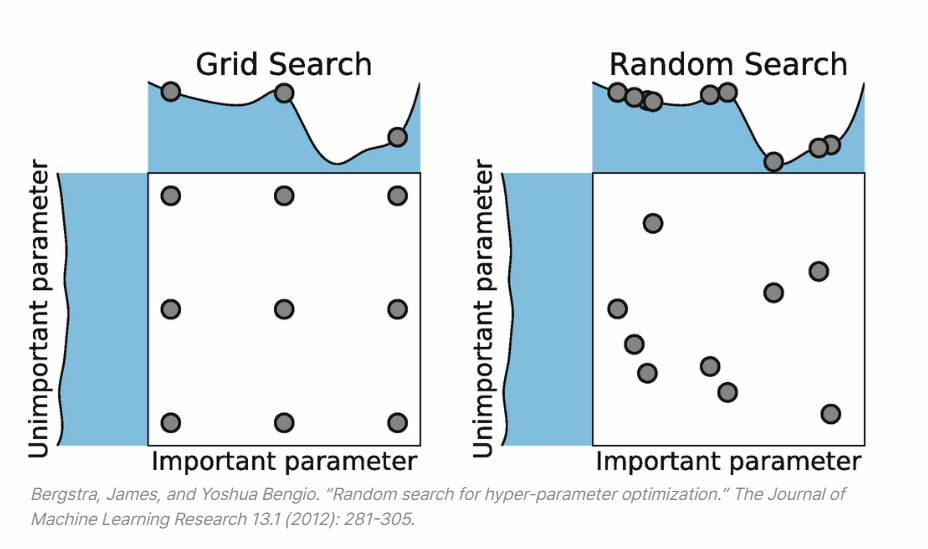

In [81]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [82]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFF135B750>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AFF1358CD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFF135B610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFF135BB10>},
                   random_state=42)

In [83]:
# 그리드서치로 하이퍼파라미터 최적화 후 최종 성능 0.8683865773302731

In [84]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [85]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [86]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


In [ ]:
# splitter를 random으로 변경

In [87]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFF135B750>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AFF1358CD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFF135B610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFF135BB10>},
                   random_state=42)

In [88]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 43, 'min_impurity_decrease': np.float64(0.00011407982271508446), 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077
